<a href="https://colab.research.google.com/github/rahulkumar-24/Web-Scraping-Project/blob/main/RAHUL_KUMAR_Numerical_Programming_in_Python_Web_Scraping.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Web Scraping & Data Handling Challenge**



### **Website:**
JustWatch -  https://www.justwatch.com/in/movies?release_year_from=2000


### **Description:**

JustWatch is a popular platform that allows users to search for movies and TV shows across multiple streaming services like Netflix, Amazon Prime, Hulu, etc. For this assignment, you will be required to scrape movie and TV show data from JustWatch using Selenium, Python, and BeautifulSoup. Extract data from HTML, not by directly calling their APIs. Then, perform data filtering and analysis using Pandas, and finally, save the results to a CSV file.

### **Tasks:**

**1. Web Scraping:**

Use BeautifulSoup to scrape the following data from JustWatch:

   **a. Movie Information:**

      - Movie title
      - Release year
      - Genre
      - IMDb rating
      - Streaming services available (Netflix, Amazon Prime, Hulu, etc.)
      - URL to the movie page on JustWatch

   **b. TV Show Information:**

      - TV show title
      - Release year
      - Genre
      - IMDb rating
      - Streaming services available (Netflix, Amazon Prime, Hulu, etc.)
      - URL to the TV show page on JustWatch

  **c. Scope:**

```
 ` - Scrape data for at least 50 movies and 50 TV shows.
   - You can choose the entry point (e.g., starting with popular movies,
     or a specific genre, etc.) to ensure a diverse dataset.`

```


**2. Data Filtering & Analysis:**

   After scraping the data, use Pandas to perform the following tasks:

   **a. Filter movies and TV shows based on specific criteria:**

   ```
      - Only include movies and TV shows released in the last 2 years (from the current date).
      - Only include movies and TV shows with an IMDb rating of 7 or higher.
```

   **b. Data Analysis:**

   ```
      - Calculate the average IMDb rating for the scraped movies and TV shows.
      - Identify the top 5 genres that have the highest number of available movies and TV shows.
      - Determine the streaming service with the most significant number of offerings.
      
   ```   

**3. Data Export:**

```
   - Dump the filtered and analysed data into a CSV file for further processing and reporting.

   - Keep the CSV file in your Drive Folder and Share the Drive link on the colab while keeping view access with anyone.
```

**Submission:**
```
- Submit a link to your Colab made for the assignment.

- The Colab should contain your Python script (.py format only) with clear
  comments explaining the scraping, filtering, and analysis process.

- Your Code shouldn't have any errors and should be executable at a one go.

- Before Conclusion, Keep your Dataset Drive Link in the Notebook.
```



**Note:**

1. Properly handle errors and exceptions during web scraping to ensure a robust script.

2. Make sure your code is well-structured, easy to understand, and follows Python best practices.

3. The assignment will be evaluated based on the correctness of the scraped data, accuracy of data filtering and analysis, and the overall quality of the Python code.








# **Start The Project**

## **Task 1:- Web Scrapping**

In [ ]:
#Installing all necessary labraries
!pip install bs4
!pip install requests
!pip install wordcloud matplotlib pandas


In [ ]:
#import all necessary labraries
import requests
from bs4 import BeautifulSoup
import re
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from datetime import datetime

## **Scrapping Movies Data**

In [ ]:
def fetch_movie_urls(url):
    headers = {
        'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.36'
    }
    response = requests.get(url, headers=headers)
    if response.status_code != 200:
        return "Failed to retrieve the page, status code:", response.status_code
    soup = BeautifulSoup(response.text, 'html.parser')
    return soup


url = 'https://www.justwatch.com/in/movies?release_year_from=2000'
soup=fetch_movie_urls(url)
print(soup.prettify())

## Hint : Use the following code to extract the film urls
# movie_links = soup.find_all('a', href=True)
# movie_urls = [link['href'] for link in movie_links if '/movie/' in link['href']]

# url_list=[]
# for x in movie_urls:
#   url_list.append('https://www.justwatch.com'+x)

<!DOCTYPE html>
<html data-vue-meta="%7B%22dir%22:%7B%22ssr%22:%22ltr%22%7D,%22lang%22:%7B%22ssr%22:%22en%22%7D%7D" data-vue-meta-server-rendered="" dir="ltr" lang="en">
 <head>
  <meta charset="utf-8"/>
  <meta content="IE=edge" http-equiv="X-UA-Compatible"/>
  <meta charset="utf-8" data-vue-meta="ssr"/>
  <meta content="IE=edge" data-vue-meta="ssr" httpequiv="X-UA-Compatible"/>
  <meta content="viewport-fit=cover, width=device-width, initial-scale=1.0, minimum-scale=1.0, maximum-scale=1.0, user-scalable=no" data-vue-meta="ssr" name="viewport"/>
  <meta content="JustWatch" data-vue-meta="ssr" property="og:site_name"/>
  <meta content="794243977319785" data-vue-meta="ssr" property="fb:app_id"/>
  <meta content="/appassets/img/JustWatch_logo_with_claim.png" data-vmid="og:image" data-vue-meta="ssr" property="og:image"/>
  <meta content="606" data-vmid="og:image:width" data-vue-meta="ssr" property="og:image:width"/>
  <meta content="302" data-vmid="og:image:height" data-vue-meta="ssr" pro

## **Fetching Movie URL's**

In [ ]:
# Write Your Code here
# soup.find_all('a', attrs = {'class':'title-list-grid__item--link'})[0]['href']
# list_link = []
# for i in soup.find_all('a', attrs = {'class':'title-list-grid__item--link'}):
#   list_link.append('https://www.justwatch.com'+i['href'])

# print(list_link)


# Initialize a list to store movie links
movie_link = []

# Extract all movie links and store them in the movie_link list
for i in soup.find_all('a', attrs={'class': 'title-list-grid__item--link'}):
    movie_link.append('https://www.justwatch.com' + i['href'])


# Display the list of links and the list of dictionaries
print("Movie Links List:", movie_link)




Movie Links List: ['https://www.justwatch.com/in/movie/project-k', 'https://www.justwatch.com/in/movie/maharaja-2024', 'https://www.justwatch.com/in/movie/munjha', 'https://www.justwatch.com/in/movie/the-gangster-the-cop-the-devil', 'https://www.justwatch.com/in/movie/aavesham-2024', 'https://www.justwatch.com/in/movie/family-star', 'https://www.justwatch.com/in/movie/furiosa', 'https://www.justwatch.com/in/movie/the-fall-guy', 'https://www.justwatch.com/in/movie/maharshi', 'https://www.justwatch.com/in/movie/inside-out', 'https://www.justwatch.com/in/movie/kill-2024', 'https://www.justwatch.com/in/movie/godzilla-minus-one', 'https://www.justwatch.com/in/movie/civil-war-2024-0', 'https://www.justwatch.com/in/movie/sri-2023', 'https://www.justwatch.com/in/movie/aadujeevitham', 'https://www.justwatch.com/in/movie/garudan-2024', 'https://www.justwatch.com/in/movie/godzilla-x-kong-the-new-empire', 'https://www.justwatch.com/in/movie/maharaj', 'https://www.justwatch.com/in/movie/manjummel-b

## **Scrapping Movie Title**

In [ ]:
# Write Your Code here

# Function to fetch movie data and return the parsed HTML (soup) and status code
def fetch_movie_data(url):
    headers = {
        'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.36'
    }
    response = requests.get(url, headers=headers)
    if response.status_code != 200:
        return None, response.status_code  # Return None and the status code if the request failed
    soup = BeautifulSoup(response.text, 'html.parser')
    return soup, response.status_code  # Return the soup object and status code

# Initialize a list to store all movie info dictionaries
all_movie_info = []

# Iterate over each movie link to fetch and store data
for l in movie_link:
    info_dict = {}
    url = l
    soup, status_code = fetch_movie_data(url)

    try:
        # Extract movie title and store it in the dictionary
        info_dict['Movie_Title'] = soup.find_all('div', attrs={'data-testid': 'titleBlock'})[0].find('h1').text.strip()
        all_movie_info.append(info_dict)  # Append the info_dict to the list
    except Exception as e:
        print(f"Error extracting movie title from {url}: {e}")

    time.sleep(4)  # Add delay between requests to avoid being blocked and getting status code 429 (Too Many Requests)

# Print all collected movie information
for movie in all_movie_info:
    print(movie)


{'Movie_Title': 'Kalki 2898 AD'}
{'Movie_Title': 'Maharaja'}
{'Movie_Title': 'Munjya'}
{'Movie_Title': 'The Gangster, the Cop, the Devil'}
{'Movie_Title': 'Aavesham'}
{'Movie_Title': 'Family Star'}
{'Movie_Title': 'Furiosa: A Mad Max Saga'}
{'Movie_Title': 'The Fall Guy'}
{'Movie_Title': 'Maharshi'}
{'Movie_Title': 'Inside Out'}
{'Movie_Title': 'Kill'}
{'Movie_Title': 'Godzilla Minus One'}
{'Movie_Title': 'Civil War'}
{'Movie_Title': 'Srikanth'}
{'Movie_Title': 'The Goat Life'}
{'Movie_Title': 'Garudan'}
{'Movie_Title': 'Godzilla x Kong: The New Empire'}
{'Movie_Title': 'Maharaj'}
{'Movie_Title': 'Manjummel Boys'}
{'Movie_Title': 'Aranmanai 4'}
{'Movie_Title': 'Kingdom of the Planet of the Apes'}
{'Movie_Title': 'Laapataa Ladies'}
{'Movie_Title': 'Dune: Part Two'}
{'Movie_Title': 'Hit Man'}
{'Movie_Title': 'Guruvayoor Ambalanadayil'}
{'Movie_Title': 'Oppenheimer'}
{'Movie_Title': '365 Days'}
{'Movie_Title': 'Rockstar'}
{'Movie_Title': 'Je Jatt Vigarh Gya'}
{'Movie_Title': 'Kung Fu Pand

## **Scrapping release Year**

In [ ]:
# Write Your Code here

# Initialize a list to store movie release years
movie_realse_year = []

# Iterate over each movie link to fetch and store release year data
for k in movie_link:
    realse_dict = {}
    url = k
    soup, status_code = fetch_movie_data(url)

    try:
        # Extract the movie release year and store it in the dictionary
        realse_dict['Realse_Year'] = eval(soup.find_all('div', attrs={'data-testid': 'titleBlock'})[0].find('span').text.strip())
        movie_realse_year.append(realse_dict)  # Append the release year dictionary to the list
    except Exception as e:
        print(f"Error extracting movie release year from {url}: {e}")

    time.sleep(3)  # Add delay between requests to avoid being blocked and getting status code 429  (Too Many Requests)

# Print all collected movie release year information
for year in movie_realse_year:
    print(year)

{'Realse_Year': 2024}
{'Realse_Year': 2024}
{'Realse_Year': 2024}
{'Realse_Year': 2019}
{'Realse_Year': 2024}
{'Realse_Year': 2024}
{'Realse_Year': 2024}
{'Realse_Year': 2024}
{'Realse_Year': 2019}
{'Realse_Year': 2015}
{'Realse_Year': 2024}
{'Realse_Year': 2023}
{'Realse_Year': 2024}
{'Realse_Year': 2024}
{'Realse_Year': 2024}
{'Realse_Year': 2024}
{'Realse_Year': 2024}
{'Realse_Year': 2024}
{'Realse_Year': 2024}
{'Realse_Year': 2024}
{'Realse_Year': 2024}
{'Realse_Year': 2024}
{'Realse_Year': 2024}
{'Realse_Year': 2024}
{'Realse_Year': 2024}
{'Realse_Year': 2023}
{'Realse_Year': 2020}
{'Realse_Year': 2011}
{'Realse_Year': 2024}
{'Realse_Year': 2024}
{'Realse_Year': 2024}
{'Realse_Year': 2024}
{'Realse_Year': 2024}
{'Realse_Year': 2015}
{'Realse_Year': 2024}
{'Realse_Year': 2024}
{'Realse_Year': 2023}
{'Realse_Year': 2023}
{'Realse_Year': 2023}
{'Realse_Year': 2024}
{'Realse_Year': 2023}
{'Realse_Year': 2024}
{'Realse_Year': 2014}
{'Realse_Year': 2024}
{'Realse_Year': 2021}
{'Realse_Y

## **Scrapping Genres**

In [ ]:
# Write Your Code here

# Initialize a list to store movie genre information
movie_genres = []

# Iterate over each movie link to fetch and store genre data
for k in movie_link:
    movie_category = {}
    url = k
    soup, status_code = fetch_movie_data(url)

    try:
        # Extract the movie genre and store it in the dictionary
        movie_category['Genre'] = soup.find_all('span', attrs={'class': 'detail-infos__value'})[0].text.strip()
        movie_genres.append(movie_category)  # Append the genre dictionary to the list
    except Exception as e:
        print(f"Error extracting movie genre from {url}: {e}")

    time.sleep(2)  # Add delay between requests to avoid being blocked and getting status code 429 (Too Many Requests)

# Print all collected movie genre information
for genre in movie_genres:
    print(genre)

{'Genre': 'Science-Fiction, Fantasy, Mystery & Thriller, Action & Adventure, Drama'}
{'Genre': 'Mystery & Thriller, Action & Adventure, Drama'}
{'Genre': 'Comedy, Horror'}
{'Genre': 'Crime, Action & Adventure, Mystery & Thriller'}
{'Genre': 'Comedy, Action & Adventure'}
{'Genre': 'Action & Adventure, Drama, Comedy, Romance'}
{'Genre': 'Science-Fiction, Mystery & Thriller, Action & Adventure'}
{'Genre': 'Action & Adventure, Comedy, Drama, Romance'}
{'Genre': 'Drama, Action & Adventure'}
{'Genre': 'Drama, Comedy, Animation, Kids & Family, Fantasy'}
{'Genre': 'Mystery & Thriller, Action & Adventure, Crime, Drama'}
{'Genre': 'Science-Fiction, Action & Adventure, Drama, Horror'}
{'Genre': 'Mystery & Thriller, Action & Adventure, Drama, War & Military'}
{'Genre': 'Drama'}
{'Genre': 'Drama'}
{'Genre': 'Action & Adventure, Crime, Mystery & Thriller'}
{'Genre': 'Action & Adventure, Fantasy, Science-Fiction, Mystery & Thriller'}
{'Genre': 'Drama, History, Mystery & Thriller, Crime'}
{'Genre': 'D

## **Scrapping IMBD Rating**

In [ ]:
# Write Your Code here

# Initialize a list to store IMDb rating information
imdb_rating = []

# Iterate over each movie link to fetch and store IMDb rating data
for k in movie_link:
    movie_rating = {}
    url = k
    soup, status_code = fetch_movie_data(url)

    try:
        # Extract the IMDb rating and store it in the dictionary
        movie_rating['IMDB_Rating'] = eval(soup.find_all('div', attrs={'class': 'jw-scoring-listing__rating'})[1].find('span').text.strip().split('  ')[0])
        imdb_rating.append(movie_rating)  # Append the rating dictionary to the list
    except Exception as e:
        # Print an error message if there's an issue extracting the IMDb rating
        # Includes the URL and the exception message for debugging
        print(f"Error extracting IMDb rating from {url}: {e}")

    time.sleep(2)  # Add delay between requests to avoid being blocked and getting status code 429 (Too Many Requests)

# Print all collected IMDb rating information
for rating in imdb_rating:
    print(rating)


Error extracting IMDb rating from https://www.justwatch.com/in/movie/monkey-man: list index out of range
{'IMDB_Rating': 7.7}
{'IMDB_Rating': 8.7}
{'IMDB_Rating': 7.2}
{'IMDB_Rating': 6.9}
{'IMDB_Rating': 7.9}
{'IMDB_Rating': 5.3}
{'IMDB_Rating': 7.7}
{'IMDB_Rating': 7.0}
{'IMDB_Rating': 7.2}
{'IMDB_Rating': 8.1}
{'IMDB_Rating': 8.0}
{'IMDB_Rating': 7.7}
{'IMDB_Rating': 7.1}
{'IMDB_Rating': 7.5}
{'IMDB_Rating': 8.5}
{'IMDB_Rating': 7.2}
{'IMDB_Rating': 6.1}
{'IMDB_Rating': 6.5}
{'IMDB_Rating': 8.3}
{'IMDB_Rating': 5.2}
{'IMDB_Rating': 7.1}
{'IMDB_Rating': 8.5}
{'IMDB_Rating': 8.6}
{'IMDB_Rating': 6.9}
{'IMDB_Rating': 6.7}
{'IMDB_Rating': 8.3}
{'IMDB_Rating': 3.3}
{'IMDB_Rating': 7.7}
{'IMDB_Rating': 4.6}
{'IMDB_Rating': 6.3}
{'IMDB_Rating': 6.8}
{'IMDB_Rating': 7.9}
{'IMDB_Rating': 8.1}
{'IMDB_Rating': 8.1}
{'IMDB_Rating': 6.9}
{'IMDB_Rating': 5.9}
{'IMDB_Rating': 6.1}
{'IMDB_Rating': 6.2}
{'IMDB_Rating': 7.8}
{'IMDB_Rating': 7.9}
{'IMDB_Rating': 6.5}
{'IMDB_Rating': 7.8}
{'IMDB_Rating

## **Scrapping Runtime/Duration**

In [ ]:
# Write Your Code here

# Initialize a list to store movie runtime information
movie_runtime = []

# Iterate over each movie link to fetch and store runtime data
for l in movie_link:
    info_runtime = {}  # Dictionary to store runtime information for each movie
    url = l  # The URL of the movie page
    soup, status_code = fetch_movie_data(url)  # Fetch the page content

    try:
        # Find all 'div' elements with the class 'detail-infos'
        for i in soup.find_all('div', attrs={'class': 'detail-infos'}):
            # Check if the current div contains the text 'Runtime'
            if i.find_all('h3', attrs={'class': 'detail-infos__subheading'})[0].text.strip() == 'Runtime':
                # Extract and store the runtime value in the dictionary
                info_runtime['Runtime'] = i.find_all('div', attrs={'class': 'detail-infos__value'})[0].text.strip()
                movie_runtime.append(info_runtime)  # Append the runtime information to the list
    except Exception as e:
        # Print an error message if there's an issue extracting runtime information
        # Includes the URL and the exception message for debugging
        print(f"Error extracting runtime from {url}: {e}")

    time.sleep(2)  # Add delay between requests to avoid being blocked and getting status code 429 (Too Many Requests)

# Print all collected movie runtime information
for runtime in movie_runtime:
    print(runtime)



{'Runtime': '3h 1min'}
{'Runtime': '3h 1min'}
{'Runtime': '2h 30min'}
{'Runtime': '2h 30min'}
{'Runtime': '2h 3min'}
{'Runtime': '2h 3min'}
{'Runtime': '1h 50min'}
{'Runtime': '1h 50min'}
{'Runtime': '2h 38min'}
{'Runtime': '2h 38min'}
{'Runtime': '2h 39min'}
{'Runtime': '2h 39min'}
{'Runtime': '2h 28min'}
{'Runtime': '2h 28min'}
{'Runtime': '2h 6min'}
{'Runtime': '2h 6min'}
{'Runtime': '2h 56min'}
{'Runtime': '2h 56min'}
{'Runtime': '1h 34min'}
{'Runtime': '1h 34min'}
{'Runtime': '1h 45min'}
{'Runtime': '1h 45min'}
{'Runtime': '2h 4min'}
{'Runtime': '2h 4min'}
{'Runtime': '1h 49min'}
{'Runtime': '1h 49min'}
{'Runtime': '2h 14min'}
{'Runtime': '2h 14min'}
{'Runtime': '2h 52min'}
{'Runtime': '2h 52min'}
{'Runtime': '2h 13min'}
{'Runtime': '2h 13min'}
{'Runtime': '1h 55min'}
{'Runtime': '1h 55min'}
{'Runtime': '2h 12min'}
{'Runtime': '2h 12min'}
{'Runtime': '2h 15min'}
{'Runtime': '2h 15min'}
{'Runtime': '2h 28min'}
{'Runtime': '2h 28min'}
{'Runtime': '2h 25min'}
{'Runtime': '2h 25min'}


## **Scrapping Age Rating**

In [ ]:
# Write Your Code here

# Initialize a list to store movie age rating information
movie_age_rating = []

# Iterate over each movie link to fetch and store age rating data
for l in movie_link:
    info_age_rating = {}  # Dictionary to store age rating information for each movie
    url = l  # The URL of the movie page
    soup, status_code = fetch_movie_data(url)  # Fetch the page content

    try:
        # Find all 'div' elements with the class 'detail-infos'
        for i in soup.find_all('div', attrs={'class': 'detail-infos'}):
            # Check if the current div contains the text 'Age rating'
            if i.find_all('h3', attrs={'class': 'detail-infos__subheading'})[0].text.strip() == 'Age rating':
                # Extract and store the age rating value in the dictionary
                info_age_rating['Age_rating'] = i.find_all('div', attrs={'class': 'detail-infos__value'})[0].text.strip()
                movie_age_rating.append(info_age_rating)  # Append the age rating information to the list
    except Exception as e:
        # Print an error message if there's an issue extracting age rating information
        # Includes the URL and the exception message for debugging
        print(f"Error extracting age rating from {url}: {e}")

    time.sleep(2)  # Add delay between requests to avoid being blocked and getting status code 429 (Too Many Requests)

# Print all collected movie age rating information
for age_rating in movie_age_rating:
    print(age_rating)



{'Age_rating': 'UA'}
{'Age_rating': 'UA'}
{'Age_rating': 'A'}
{'Age_rating': 'A'}
{'Age_rating': 'UA'}
{'Age_rating': 'UA'}
{'Age_rating': 'UA'}
{'Age_rating': 'UA'}
{'Age_rating': 'U'}
{'Age_rating': 'U'}
{'Age_rating': 'A'}
{'Age_rating': 'A'}
{'Age_rating': 'U'}
{'Age_rating': 'U'}
{'Age_rating': 'UA'}
{'Age_rating': 'UA'}
{'Age_rating': 'UA'}
{'Age_rating': 'UA'}
{'Age_rating': 'UA'}
{'Age_rating': 'UA'}
{'Age_rating': 'UA'}
{'Age_rating': 'UA'}
{'Age_rating': 'UA'}
{'Age_rating': 'UA'}
{'Age_rating': 'A'}
{'Age_rating': 'A'}
{'Age_rating': 'UA'}
{'Age_rating': 'UA'}
{'Age_rating': 'UA'}
{'Age_rating': 'UA'}
{'Age_rating': 'U'}
{'Age_rating': 'U'}
{'Age_rating': 'UA'}
{'Age_rating': 'UA'}
{'Age_rating': 'U'}
{'Age_rating': 'U'}
{'Age_rating': 'A'}
{'Age_rating': 'A'}
{'Age_rating': 'UA'}
{'Age_rating': 'UA'}
{'Age_rating': 'UA'}
{'Age_rating': 'UA'}
{'Age_rating': 'A'}
{'Age_rating': 'A'}
{'Age_rating': 'A'}
{'Age_rating': 'A'}
{'Age_rating': 'U'}
{'Age_rating': 'U'}
{'Age_rating':

## **Fetching Production Countries Details**

In [ ]:
# Write Your Code here

# Initialize a list to store movie production information
movie_production = []

# Iterate over each movie link to fetch and store production country data
for l in movie_link:
    info_production = {}  # Dictionary to store production information for each movie
    url = l  # The URL of the movie page
    soup, status_code = fetch_movie_data(url)  # Fetch the page content

    try:
        # Find all 'div' elements with the class 'detail-infos'
        for i in soup.find_all('div', attrs={'class': 'detail-infos'}):
            # Check if the current div contains the text 'Production country'
            if i.find_all('h3', attrs={'class': 'detail-infos__subheading'})[0].text.strip() == 'Production country':
                # Extract and store the production country value in the dictionary
                info_production['Production_country'] = i.find_all('div', attrs={'class': 'detail-infos__value'})[0].text.strip()
                movie_production.append(info_production)  # Append the production information to the list
    except Exception as e:
        # Print an error message if there's an issue extracting production country information
        # Includes the URL and the exception message for debugging
        print(f"Error extracting production country from {url}: {e}")

    time.sleep(2)  # Add delay between requests to avoid being blocked and getting status code 429 (Too Many Requests)

# Print all collected movie production information
for production in movie_production:
    print(production)

{'Production_country': 'India'}
{'Production_country': 'India'}
{'Production_country': 'India'}
{'Production_country': 'India'}
{'Production_country': 'India'}
{'Production_country': 'India'}
{'Production_country': 'South Korea'}
{'Production_country': 'South Korea'}
{'Production_country': 'India'}
{'Production_country': 'India'}
{'Production_country': 'India'}
{'Production_country': 'India'}
{'Production_country': 'Australia, United States'}
{'Production_country': 'Australia, United States'}
{'Production_country': 'Canada, United States, Australia'}
{'Production_country': 'Canada, United States, Australia'}
{'Production_country': 'India'}
{'Production_country': 'India'}
{'Production_country': 'United States'}
{'Production_country': 'United States'}
{'Production_country': 'India, United States'}
{'Production_country': 'India, United States'}
{'Production_country': 'Japan'}
{'Production_country': 'Japan'}
{'Production_country': 'United Kingdom, United States'}
{'Production_country': 'Un

## **Fetching Streaming Service Details**

In [ ]:
# Write Your Code here

# Initialize a list to store movie streaming services information
movie_streaming_services = []

# Iterate over each movie link to fetch and store streaming services data
for l in movie_link:
    info_streaming = {}  # Dictionary to store streaming services information for each movie
    url = l  # The URL of the movie page
    soup, status_code = fetch_movie_data(url)  # Fetch the page content

    try:
        # Find all <img> tags with the class 'offer__icon'
        img_tags = soup.find_all('img', attrs={'class': 'offer__icon'})

        # Extract the 'alt' attribute from each <img> tag
        # Join the list of streaming services with ', ' to store as a comma-separated string
        streaming_services = ', '.join(img['alt'] for img in img_tags)
        info_streaming['Streaming_Services'] = streaming_services  # Store the comma-separated string in the dictionary

        movie_streaming_services.append(info_streaming)  # Append the streaming services information to the list
    except Exception as e:
        # Print an error message if there's an issue extracting streaming services information
        # Includes the URL and the exception message for debugging
        print(f"Error extracting streaming services from {url}: {e}")

    time.sleep(4)  # Add delay between requests to avoid being blocked and getting status code 429  (Too Many Requests)

# Print all collected movie streaming services information
for streaming in movie_streaming_services:
    print(streaming)




{'Streaming_Services': 'Bookmyshow'}
{'Streaming_Services': 'Netflix, Bookmyshow'}
{'Streaming_Services': 'Bookmyshow'}
{'Streaming_Services': 'Lionsgate Play'}
{'Streaming_Services': 'Amazon Prime Video, Amazon Prime Video, Hotstar, Amazon Video'}
{'Streaming_Services': 'Amazon Prime Video, Amazon Prime Video, Jio Cinema, Bookmyshow, Amazon Video'}
{'Streaming_Services': 'Apple TV, Apple TV, Amazon Video, Apple TV'}
{'Streaming_Services': 'Apple TV, Zee5, Amazon Video, Apple TV, Apple TV'}
{'Streaming_Services': 'Amazon Prime Video, Amazon Prime Video, Hotstar, Amazon Video'}
{'Streaming_Services': 'Apple TV, Hotstar, Apple TV, Apple TV'}
{'Streaming_Services': ''}
{'Streaming_Services': 'Netflix'}
{'Streaming_Services': 'Amazon Prime Video, Amazon Prime Video'}
{'Streaming_Services': 'Netflix'}
{'Streaming_Services': 'Netflix'}
{'Streaming_Services': 'Amazon Prime Video, Amazon Prime Video, Bookmyshow, Amazon Video'}
{'Streaming_Services': 'Apple TV, Amazon Video, Apple TV, Apple TV'

## **Now Creating Movies DataFrame**

In [ ]:
# Write Your Code here

# Initialize a list to store all movie information dictionaries
movie_info_full_data = []

# Iterate over each movie link to fetch and store movie data
for l in movie_link:
    info_d = {}  # Dictionary to store information for each movie
    url = l  # The URL of the movie page
    soup, status_code = fetch_movie_data(url)  # Fetch the page content

    try:
        # Extract movie title
        info_d['link'] = l
        info_d['title'] = soup.find_all('div', attrs={'data-testid': 'titleBlock'})[0].find('h1').text.strip()

        # Extract release year
        info_d['release_year'] = eval(soup.find_all('div', attrs={'data-testid': 'titleBlock'})[0].find('span').text.strip())

        # Extract genre
        info_d['Genre'] = soup.find_all('span', attrs={'class': 'detail-infos__value'})[0].text.strip()

        # Extract IMDb rating
        info_d['IMDB_Rating'] = eval(soup.find_all('div', attrs={'class': 'jw-scoring-listing__rating'})[1].find('span').text.strip().split(' ')[0])

        # Extract additional details like runtime, age rating, and production country
        for i in soup.find_all('div', attrs={'class': 'detail-infos'}):
            if i.find_all('h3', attrs={'class': 'detail-infos__subheading'})[0].text == 'Runtime':
                info_d['Runtime'] = i.find_all('div', attrs={'class': 'detail-infos__value'})[0].text.strip()
            elif i.find_all('h3', attrs={'class': 'detail-infos__subheading'})[0].text == 'Age rating':
                info_d['Age_rating'] = i.find_all('div', attrs={'class': 'detail-infos__value'})[0].text
            elif i.find_all('h3', attrs={'class': 'detail-infos__subheading'})[0].text.strip() == 'Production country':
                info_d['Production_country'] = i.find_all('div', attrs={'class': 'detail-infos__value'})[0].text.strip()

        # Extract streaming services
        img_tags = soup.find_all('img', attrs={'class': 'offer__icon'})
        streaming_services = ', '.join(img['alt'] for img in img_tags)
        info_d['Streaming_Services'] = streaming_services

    except IndexError as e:
        # Print error if there's an index issue (e.g., accessing a non-existent element)
        print(f"Index error for {l}: {e}")
    except AttributeError as e:
        # Print error if there's an issue accessing attributes (e.g., 'text' attribute missing)
        print(f"Attribute error for {l}: {e}")
    except Exception as e:
        # Print error for any other exception
        print(f"An error occurred for {l}: {e}")

    # Append the movie information to the list
    movie_info_full_data.append(info_d)

    # Add delay between requests to avoid being blocked and getting status code 429 (Too Many Requests)
    time.sleep(4)

# Convert the list of movie information dictionaries to a DataFrame
movie_dataframe = pd.DataFrame(movie_info_full_data)

# Display the DataFrame
movie_dataframe


# getting index error for this link  [https://www.justwatch.com/in/movie/monkey-man]  because the IMDB rating data for the movie is not present in the page.

Index error for https://www.justwatch.com/in/movie/monkey-man: list index out of range


,link,title,release_year,Genre,IMDB_Rating,Runtime,Age_rating,Production_country,Streaming_Services
0,https://www.justwatch.com/in/movie/project-k,Kalki 2898 AD,2024,"Science-Fiction, Fantasy, Mystery & Thriller, ...",7.7,3h 1min,UA,India,Bookmyshow
1,https://www.justwatch.com/in/movie/maharaja-2024,Maharaja,2024,"Mystery & Thriller, Action & Adventure, Drama",8.7,2h 30min,NaN,India,"Netflix, Bookmyshow"
2,https://www.justwatch.com/in/movie/munjha,Munjya,2024,"Comedy, Horror",7.2,2h 3min,NaN,India,Bookmyshow
3,https://www.justwatch.com/in/movie/the-gangste...,"The Gangster, the Cop, the Devil",2019,"Crime, Action & Adventure, Mystery & Thriller",6.9,1h 50min,NaN,South Korea,Lionsgate Play
4,https://www.justwatch.com/in/movie/aavesham-2024,Aavesham,2024,"Comedy, Action & Adventure",7.9,2h 38min,NaN,India,"Amazon Prime Video, Amazon Prime Video, Hotsta..."
...,...,...,...,...,...,...,...,...,...
95,https://www.justwatch.com/in/movie/longlegs,Longlegs,2024,"Crime, Horror, Mystery & Thriller",7.3,1h 41min,A,"United States, Canada",Bookmyshow
96,https://www.justwatch.com/in/movie/blade-runne...,Blade Runner 2049,2017,"Drama, Action & Adventure, Science-Fiction, My...",8.0,2h 44min,A,"Canada, United Kingdom, United States","Amazon Prime Video, Apple TV, Netflix, Amazon ..."
97,https://www.justwatch.com/in/movie/tumbbad,Tumbbad,2018,"Horror, Drama, Fantasy, Mystery & Thriller, Ma...",8.2,1h 53min,A,"Sweden, India",
98,https://www.justwatch.com/in/movie/black-magic...,Shaitaan,2024,"Mystery & Thriller, Horror, Drama",6.6,2h 12min,UA,India,Netflix


## **Scraping TV  Show Data**

In [ ]:
# Specifying the URL from which tv show related data will be fetched

tv_url = 'https://www.justwatch.com/in/tv-shows?release_year_from=2000'

# Function to fetch TV show URLs from the given URL
# It allows for dynamic fetching of data from any URL by simply passing a different URL to the function.
def fetch_tv_show_urls(tv_url):
    # Define headers to mimic a browser request and avoid potential blocking by the server
    headers = {
        'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.36'
    }

    # Send an HTTP GET request to the URL with the specified headers
    response = requests.get(tv_url, headers=headers)

    # Check if the request was successful (status code 200 indicates success)
    if response.status_code != 200:
        # Return None and an error message if the request failed
        return None, f"Failed to retrieve the page, status code: {response.status_code}"

    # Parse the HTML content using BeautifulSoup for easier extraction of data
    soup = BeautifulSoup(response.text, 'html.parser')
    return soup, response.status_code

# Fetch TV show URLs and HTML content using the defined function
soup, status_code = fetch_tv_show_urls(tv_url)

# Fetch TV show URLs and HTML content
soup, status_code = fetch_tv_show_urls(tv_url)

print(soup.prettify())

<!DOCTYPE html>
<html data-vue-meta="%7B%22dir%22:%7B%22ssr%22:%22ltr%22%7D,%22lang%22:%7B%22ssr%22:%22en%22%7D%7D" data-vue-meta-server-rendered="" dir="ltr" lang="en">
 <head>
  <meta charset="utf-8"/>
  <meta content="IE=edge" http-equiv="X-UA-Compatible"/>
  <meta charset="utf-8" data-vue-meta="ssr"/>
  <meta content="IE=edge" data-vue-meta="ssr" httpequiv="X-UA-Compatible"/>
  <meta content="viewport-fit=cover, width=device-width, initial-scale=1.0, minimum-scale=1.0, maximum-scale=1.0, user-scalable=no" data-vue-meta="ssr" name="viewport"/>
  <meta content="JustWatch" data-vue-meta="ssr" property="og:site_name"/>
  <meta content="794243977319785" data-vue-meta="ssr" property="fb:app_id"/>
  <meta content="/appassets/img/JustWatch_logo_with_claim.png" data-vmid="og:image" data-vue-meta="ssr" property="og:image"/>
  <meta content="606" data-vmid="og:image:width" data-vue-meta="ssr" property="og:image:width"/>
  <meta content="302" data-vmid="og:image:height" data-vue-meta="ssr" pro

## **Fetching Tv shows Url details**

In [ ]:
# Write Your Code here

# Initialize a list to store show links

tv_show_link = []

# # Extract all movie links and store them in the tv_show_link list
for i in soup.find_all('a', attrs = {'class':'title-list-grid__item--link'}):
  tv_show_link.append('https://www.justwatch.com'+i['href'])

# Display the list of links and the list of dictionaries
print("Show Links List:" , tv_show_link)



Show Links List: ['https://www.justwatch.com/in/tv-show/mirzapur', 'https://www.justwatch.com/in/tv-show/house-of-the-dragon', 'https://www.justwatch.com/in/tv-show/the-boys', 'https://www.justwatch.com/in/tv-show/panchayat', 'https://www.justwatch.com/in/tv-show/kota-factory', 'https://www.justwatch.com/in/tv-show/demon-slayer-kimetsu-no-yaiba', 'https://www.justwatch.com/in/tv-show/game-of-thrones', 'https://www.justwatch.com/in/tv-show/the-bear', 'https://www.justwatch.com/in/tv-show/shogun-2024', 'https://www.justwatch.com/in/tv-show/gullak', 'https://www.justwatch.com/in/tv-show/apharan', 'https://www.justwatch.com/in/tv-show/evil', 'https://www.justwatch.com/in/tv-show/bigg-boss-ott', 'https://www.justwatch.com/in/tv-show/fargo', 'https://www.justwatch.com/in/tv-show/supacell', 'https://www.justwatch.com/in/tv-show/bridgerton', 'https://www.justwatch.com/in/tv-show/attack-on-titan', 'https://www.justwatch.com/in/tv-show/mastram', 'https://www.justwatch.com/in/tv-show/dark-matter-

## **Fetching Tv Show Title details**

In [ ]:
# Write Your Code here

# Initialize a list to store TV show titles
tv_show_title = []

# Loop through each TV show link
for url in tv_show_link:
    try:
        # Fetch the HTML content and status code
        soup, status_code = fetch_tv_show_urls(url)
        title = {}  # Dictionary to store the TV show title

        try:
            # Extract the TV show title
            # Ensure the 'data-testid' attribute and 'h1' tags exist before accessing them
            title["Show_Name"] = soup.find_all('div', attrs={'data-testid': 'titleBlock'})[0].find('h1').text.strip()
            tv_show_title.append(title)  # Append the title to the list
        except (IndexError, AttributeError) as e:
            # Print an error message if there's an issue extracting the title
            print(f"Error extracting TV show title from URL {url}: {e}")

    except Exception as e:
        # Print the URL and error message if an unexpected exception occurs
        print(f"Unexpected error for URL {url}: {e}")

    # Add delay between requests to avoid being blocked or getting status code 429 (Too Many Requests)
    time.sleep(4)

# Print all collected TV show titles
for show in tv_show_title:
    print(show)



{'Show_Name': 'Mirzapur'}
{'Show_Name': 'House of the Dragon'}
{'Show_Name': 'The Boys'}
{'Show_Name': 'Panchayat'}
{'Show_Name': 'Kota Factory'}
{'Show_Name': 'Demon Slayer: Kimetsu no Yaiba'}
{'Show_Name': 'Game of Thrones'}
{'Show_Name': 'The Bear'}
{'Show_Name': 'Shōgun'}
{'Show_Name': 'Gullak'}
{'Show_Name': 'Apharan'}
{'Show_Name': 'Evil'}
{'Show_Name': 'Bigg Boss OTT'}
{'Show_Name': 'Fargo'}
{'Show_Name': 'Supacell'}
{'Show_Name': 'Bridgerton'}
{'Show_Name': 'Attack on Titan'}
{'Show_Name': 'Mastram'}
{'Show_Name': 'Dark Matter'}
{'Show_Name': 'Presumed Innocent'}
{'Show_Name': 'Raising Voices'}
{'Show_Name': 'Aashram'}
{'Show_Name': 'Sweet Home'}
{'Show_Name': 'Breaking Bad'}
{'Show_Name': 'The Good Doctor'}
{'Show_Name': 'XXX: Uncensored'}
{'Show_Name': 'Heeramandi: The Diamond Bazaar'}
{'Show_Name': '3 Body Problem'}
{'Show_Name': 'Stranger Things'}
{'Show_Name': 'The Mole'}
{'Show_Name': 'Money Heist'}
{'Show_Name': 'Bigg Boss'}
{'Show_Name': 'Fallout'}
{'Show_Name': 'The Ro

## **Fetching Release Year**

In [ ]:
# Write Your Code here

# Initialize a list to store TV show release year information
show_release_year = []

# Loop through each TV show link
for url in tv_show_link:

    try:
        # Fetch the HTML content and status code
        soup, status_code = fetch_tv_show_urls(url)
        year = {}  # Dictionary to store release year information for each TV show

        # Extract the TV show release year
        # Ensure the 'text-muted' class and 'span' tags exist before accessing them
        try:
            year["Release_Year"] = eval(soup.find_all('span', attrs={'class': 'text-muted'})[0].text.strip())
            show_release_year.append(year)
        except (IndexError, AttributeError) as e:
            # Print an error message if there's an issue extracting the release year
            print(f"Error extracting TV show release year from URL {url}: {e}")

    except Exception as e:
        # Print the URL and error message if an unexpected exception occurs
        print(f"Unexpected error for URL {url}: {e}")

    # Add delay between requests to avoid being blocked or getting status code 429 (Too Many Requests)
    time.sleep(3)

# Print all collected TV show release year information
for i in show_release_year:
    print(i)


{'Release_Year': 2018}
{'Release_Year': 2022}
{'Release_Year': 2019}
{'Release_Year': 2020}
{'Release_Year': 2019}
{'Release_Year': 2019}
{'Release_Year': 2011}
{'Release_Year': 2022}
{'Release_Year': 2024}
{'Release_Year': 2019}
{'Release_Year': 2018}
{'Release_Year': 2019}
{'Release_Year': 2021}
{'Release_Year': 2014}
{'Release_Year': 2024}
{'Release_Year': 2020}
{'Release_Year': 2013}
{'Release_Year': 2020}
{'Release_Year': 2024}
{'Release_Year': 2024}
{'Release_Year': 2024}
{'Release_Year': 2020}
{'Release_Year': 2020}
{'Release_Year': 2008}
{'Release_Year': 2017}
{'Release_Year': 2018}
{'Release_Year': 2024}
{'Release_Year': 2024}
{'Release_Year': 2016}
{'Release_Year': 2022}
{'Release_Year': 2017}
{'Release_Year': 2006}
{'Release_Year': 2024}
{'Release_Year': 2018}
{'Release_Year': 2024}
{'Release_Year': 2024}
{'Release_Year': 2020}
{'Release_Year': 2023}
{'Release_Year': 2024}
{'Release_Year': 2022}
{'Release_Year': 2014}
{'Release_Year': 2021}
{'Release_Year': 2018}
{'Release_Y

## **Fetching TV Show Genre Details**

In [ ]:
# Write Your Code here

# Initialize a list to store TV show genre information
show_genre = []

# Loop through each TV show link
for url in tv_show_link:

    try:
        # Fetch the HTML content and status code
        soup, status_code = fetch_tv_show_urls(url)
        genre = {}  # Dictionary to store genre information for each TV show

        # Extract the TV show genre
        # Ensure the 'detail-infos__value' class and 'span' tags exist before accessing them
        try:
            genre["Genre"] = soup.find_all('span', attrs={'class': 'detail-infos__value'})[0].text.strip()
            show_genre.append(genre)
        except (IndexError, AttributeError) as e:
            # Print an error message if there's an issue extracting the genre
            print(f"Error extracting TV show genre from URL {url}: {e}")

    except Exception as e:
        # Print the URL and error message if an unexpected exception occurs
        print(f"Unexpected error for URL {url}: {e}")

    # Add delay between requests to avoid being blocked or getting status code 429 (Too Many Requests)
    time.sleep(2)

# Print all collected TV show genre information
for i in show_genre:
    print(i)


{'Genre': 'Crime, Action & Adventure, Drama, Mystery & Thriller'}
{'Genre': 'Science-Fiction, Drama, Action & Adventure, Fantasy, Romance'}
{'Genre': 'Science-Fiction, Action & Adventure, Comedy, Crime, Drama'}
{'Genre': 'Drama, Comedy'}
{'Genre': 'Comedy, Drama'}
{'Genre': 'Animation, Action & Adventure, Fantasy, Mystery & Thriller'}
{'Genre': 'Action & Adventure, Drama, Fantasy, Science-Fiction'}
{'Genre': 'Drama, Comedy'}
{'Genre': 'War & Military, Drama, History'}
{'Genre': 'Drama, Kids & Family, Comedy'}
{'Genre': 'Drama, Action & Adventure, Crime, Mystery & Thriller'}
{'Genre': 'Mystery & Thriller, Crime, Drama, Horror'}
{'Genre': 'Reality TV'}
{'Genre': 'Crime, Drama, Mystery & Thriller'}
{'Genre': 'Action & Adventure, Science-Fiction, Drama'}
{'Genre': 'Drama, Romance'}
{'Genre': 'Horror, Animation, Action & Adventure, Drama, Fantasy, Science-Fiction'}
{'Genre': 'Drama, Comedy, Fantasy'}
{'Genre': 'Mystery & Thriller, Drama, Science-Fiction'}
{'Genre': 'Mystery & Thriller, Dram

## **Fetching IMDB Rating Details**

In [ ]:
# Write Your Code here

# Initialize a list to store TV show IMDb ratings
show_imdb_rating = []

# Loop through each TV show link
for url in tv_show_link:

    try:
        # Fetch the HTML content and status code
        soup, status_code = fetch_tv_show_urls(url)
        show_rating = {}  # Dictionary to store IMDb rating information for each TV show

        # Extract the TV show IMDb rating
        # Ensure the 'jw-scoring-listing__rating' class and 'span' tags exist before accessing them
        try:
            # Use eval to convert the string rating to a numerical value
            show_rating["IMDB_rating"] = eval(soup.find_all('div', attrs={'class': 'jw-scoring-listing__rating'})[1].find('span').text.strip().split(' ')[0])
            show_imdb_rating.append(show_rating)  # Append the IMDb rating information to the list
        except (IndexError, AttributeError) as e:
            # Print an error message if there's an issue extracting the IMDb rating
            print(f"IMDb rating is not present for {url}: {e}")

    except Exception as e:
        # Print the URL and error message if an unexpected exception occurs
        print(f"Unexpected error for URL {url}: {e}")

    # Add delay between requests to avoid being blocked
    time.sleep(2)

# Print all collected TV show IMDb ratings
for rating in show_imdb_rating:
    print(rating)


IMDb rating is not present for https://www.justwatch.com/in/tv-show/from: list index out of range
IMDb rating is not present for https://www.justwatch.com/in/tv-show/hidden-love: 'NoneType' object has no attribute 'text'
IMDb rating is not present for https://www.justwatch.com/in/tv-show/faadu: list index out of range
IMDb rating is not present for https://www.justwatch.com/in/tv-show/undekhi: 'NoneType' object has no attribute 'text'
{'IMDB_rating': 8.5}
{'IMDB_rating': 8.4}
{'IMDB_rating': 8.7}
{'IMDB_rating': 9.0}
{'IMDB_rating': 9.0}
{'IMDB_rating': 8.6}
{'IMDB_rating': 9.2}
{'IMDB_rating': 8.6}
{'IMDB_rating': 8.7}
{'IMDB_rating': 9.1}
{'IMDB_rating': 8.2}
{'IMDB_rating': 7.8}
{'IMDB_rating': 1.9}
{'IMDB_rating': 8.9}
{'IMDB_rating': 7.0}
{'IMDB_rating': 7.4}
{'IMDB_rating': 9.1}
{'IMDB_rating': 6.9}
{'IMDB_rating': 7.7}
{'IMDB_rating': 7.7}
{'IMDB_rating': 7.2}
{'IMDB_rating': 7.4}
{'IMDB_rating': 7.3}
{'IMDB_rating': 9.5}
{'IMDB_rating': 8.0}
{'IMDB_rating': 4.8}
{'IMDB_rating':

## **Fetching Age Rating Details**

In [ ]:
# Write Your Code here

# List to store TV show age ratings
show_age_rating = []

# Loop through each TV show link
for url in tv_show_link:
    age_rating = {}  # Dictionary to store age rating information for each TV show

    # Fetch the HTML content and status code
    soup, status_code = fetch_tv_show_urls(url)

    try:
        # Find all 'div' elements with the class 'detail-infos'
        for i in soup.find_all('div', attrs={'class': 'detail-infos'}):
            # Check if the current div contains the text 'Age rating'
            if i.find_all('h3', attrs={'class': 'detail-infos__subheading'})[0].text.strip() == 'Age rating':
                # Extract and store the age rating value in the dictionary
                age_rating['Age_rating'] = i.find_all('div', attrs={'class': 'detail-infos__value'})[0].text.strip()
                show_age_rating.append(age_rating)  # Append the age rating information to the list
    except Exception as e:
        # Print an error message if there's an issue extracting age rating information
        # Includes the URL and the exception message for debugging
        print(f"Error extracting age rating from {url}: {e}")

    # Add delay between requests to avoid being blocked and getting status code 429 (Too Many Requests)
    time.sleep(2)

# Print all collected TV show age rating information
for rating in show_age_rating:
    print(rating)


{'Age_rating': 'A'}
{'Age_rating': 'A'}
{'Age_rating': 'A'}
{'Age_rating': 'A'}
{'Age_rating': 'A'}
{'Age_rating': 'A'}
{'Age_rating': 'A'}
{'Age_rating': 'A'}
{'Age_rating': 'U'}
{'Age_rating': 'U'}
{'Age_rating': 'A'}
{'Age_rating': 'A'}
{'Age_rating': 'UA'}
{'Age_rating': 'UA'}
{'Age_rating': 'A'}
{'Age_rating': 'A'}
{'Age_rating': 'A'}
{'Age_rating': 'A'}
{'Age_rating': 'A'}
{'Age_rating': 'A'}
{'Age_rating': 'U'}
{'Age_rating': 'U'}
{'Age_rating': 'U'}
{'Age_rating': 'U'}
{'Age_rating': 'A'}
{'Age_rating': 'A'}
{'Age_rating': 'A'}
{'Age_rating': 'A'}
{'Age_rating': 'U'}
{'Age_rating': 'U'}
{'Age_rating': 'A'}
{'Age_rating': 'A'}
{'Age_rating': 'U'}
{'Age_rating': 'U'}
{'Age_rating': 'U'}
{'Age_rating': 'U'}
{'Age_rating': 'A'}
{'Age_rating': 'A'}
{'Age_rating': 'U'}
{'Age_rating': 'U'}
{'Age_rating': 'A'}
{'Age_rating': 'A'}
{'Age_rating': 'A'}
{'Age_rating': 'A'}
{'Age_rating': 'UA'}
{'Age_rating': 'UA'}
{'Age_rating': 'U'}
{'Age_rating': 'U'}
{'Age_rating': 'A'}
{'Age_rating': '

## **Fetching Production Country details**

In [ ]:
# Write Your Code here

# List to store TV show production countries
production_country = []

# Loop through each TV show link
for url in tv_show_link:
    production = {}  # Dictionary to store production country information for each TV show

    # Fetch the HTML content and status code
    soup, status_code = fetch_tv_show_urls(url)

    try:
        # Find all 'div' elements with the class 'detail-infos'
        for i in soup.find_all('div', attrs={'class': 'detail-infos'}):
            # Check if the current div contains the text 'Production country'
            if i.find_all('h3', attrs={'class': 'detail-infos__subheading'})[0].text.strip() == 'Production country':
                # Extract and store the production country value in the dictionary
                production['Production_country'] = i.find_all('div', attrs={'class': 'detail-infos__value'})[0].text.strip()
                production_country.append(production)  # Append the production country information to the list
    except Exception as e:
        # Print an error message if there's an issue extracting production country information
        # Includes the URL and the exception message for debugging
        print(f"Error extracting production country from {url}: {e}")

    # Add delay between requests to avoid being blocked and getting status code 429 (Too Many Requests)
    time.sleep(2)

# Print all collected TV show production country information
for production in production_country:
    print(production)


{'Production_country': 'India'}
{'Production_country': 'India'}
{'Production_country': 'United States'}
{'Production_country': 'United States'}
{'Production_country': 'United States'}
{'Production_country': 'United States'}
{'Production_country': 'India'}
{'Production_country': 'India'}
{'Production_country': 'India'}
{'Production_country': 'India'}
{'Production_country': 'Japan'}
{'Production_country': 'Japan'}
{'Production_country': 'United Kingdom, United States'}
{'Production_country': 'United Kingdom, United States'}
{'Production_country': 'United States'}
{'Production_country': 'United States'}
{'Production_country': 'United States'}
{'Production_country': 'United States'}
{'Production_country': 'India'}
{'Production_country': 'India'}
{'Production_country': 'India'}
{'Production_country': 'India'}
{'Production_country': 'United States'}
{'Production_country': 'United States'}
{'Production_country': 'India'}
{'Production_country': 'India'}
{'Production_country': 'United States'}


## **Fetching Streaming Service details**

In [ ]:
# Write Your Code here

# List to store TV show streaming details
show_streaming_detail = []

# Loop through each TV show link
for url in tv_show_link:
    streaming_detail = {}  # Dictionary to store streaming details for each TV show

    # Fetch the HTML content and status code
    soup, status_code = fetch_tv_show_urls(url)

    try:
        # Find all <img> tags with the class 'offer__icon'
        img_tags = soup.find_all('img', attrs={'class': 'offer__icon'})

        # Extract the 'alt' attribute from each <img> tag
        # Join the list of streaming services with ', ' to store as a comma-separated string
        streaming_services = ', '.join(img['alt'] for img in img_tags)
        streaming_detail['Streaming_Services'] = streaming_services  # Store the comma-separated string in the dictionary

        # Append the streaming services information to the list
        show_streaming_detail.append(streaming_detail)
    except Exception as e:
        # Print an error message if there's an issue extracting streaming services information
        # Includes the URL and the exception message for debugging
        print(f"Error extracting streaming services from {url}: {e}")

    # Add delay between requests to avoid being blocked and to prevent status code 429 (Too Many Requests)
    time.sleep(4)

# Print all collected TV show streaming services information
for streaming in show_streaming_detail:
    print(streaming)


{'Streaming_Services': 'Amazon Prime Video, Amazon Prime Video'}
{'Streaming_Services': 'Jio Cinema'}
{'Streaming_Services': 'Amazon Prime Video, Amazon Prime Video'}
{'Streaming_Services': 'Amazon Prime Video, Amazon Prime Video'}
{'Streaming_Services': 'Netflix'}
{'Streaming_Services': 'Crunchyroll, Netflix, Crunchyroll, Crunchyroll Amazon Channel'}
{'Streaming_Services': 'Jio Cinema'}
{'Streaming_Services': 'Hotstar'}
{'Streaming_Services': 'Hotstar'}
{'Streaming_Services': 'Sony Liv'}
{'Streaming_Services': 'Jio Cinema, Alt Balaji'}
{'Streaming_Services': 'Jio Cinema'}
{'Streaming_Services': 'Jio Cinema'}
{'Streaming_Services': 'Amazon Prime Video, Amazon Prime Video'}
{'Streaming_Services': 'Netflix'}
{'Streaming_Services': 'Netflix'}
{'Streaming_Services': 'Amazon Prime Video, Amazon Prime Video, Anime Times Amazon Channel'}
{'Streaming_Services': ''}
{'Streaming_Services': 'Apple TV Plus, Apple TV+'}
{'Streaming_Services': 'Apple TV Plus, Apple TV+'}
{'Streaming_Services': 'Netf

## **Fetching Duration Details**

In [ ]:
# Write Your Code here

# List to store TV show runtime information
show_runtime = []

# Loop through each TV show link
for url in tv_show_link:
    runtime = {}  # Dictionary to store runtime information for each TV show

    # Fetch the HTML content and status code
    soup, status_code = fetch_tv_show_urls(url)

    try:
        # Find all 'div' elements with the class 'detail-infos'
        for i in soup.find_all('div', attrs={'class': 'detail-infos'}):
            # Check if the current div contains the text 'Runtime'
            if i.find_all('h3', attrs={'class': 'detail-infos__subheading'})[0].text.strip() == 'Runtime':
                # Extract and store the runtime value in the dictionary
                runtime['Runtime'] = i.find_all('div', attrs={'class': 'detail-infos__value'})[0].text.strip()
                show_runtime.append(runtime)  # Append the runtime information to the list
    except Exception as e:
        # Print an error message if there's an issue extracting runtime information
        # Includes the URL and the exception message for debugging
        print(f"Error extracting runtime from {url}: {e}")

    # Add delay between requests to avoid being blocked and to prevent status code 429 (Too Many Requests)
    time.sleep(2)

# Print all collected TV show runtime information
for entry in show_runtime:
    print(entry)


{'Runtime': '50min'}
{'Runtime': '50min'}
{'Runtime': '1h 3min'}
{'Runtime': '1h 3min'}
{'Runtime': '1h 1min'}
{'Runtime': '1h 1min'}
{'Runtime': '35min'}
{'Runtime': '35min'}
{'Runtime': '41min'}
{'Runtime': '41min'}
{'Runtime': '26min'}
{'Runtime': '26min'}
{'Runtime': '58min'}
{'Runtime': '58min'}
{'Runtime': '34min'}
{'Runtime': '34min'}
{'Runtime': '59min'}
{'Runtime': '59min'}
{'Runtime': '30min'}
{'Runtime': '30min'}
{'Runtime': '24min'}
{'Runtime': '24min'}
{'Runtime': '49min'}
{'Runtime': '49min'}
{'Runtime': '1h 30min'}
{'Runtime': '1h 30min'}
{'Runtime': '52min'}
{'Runtime': '52min'}
{'Runtime': '52min'}
{'Runtime': '52min'}
{'Runtime': '1h 1min'}
{'Runtime': '1h 1min'}
{'Runtime': '25min'}
{'Runtime': '25min'}
{'Runtime': '28min'}
{'Runtime': '28min'}
{'Runtime': '52min'}
{'Runtime': '52min'}
{'Runtime': '47min'}
{'Runtime': '47min'}
{'Runtime': '46min'}
{'Runtime': '46min'}
{'Runtime': '43min'}
{'Runtime': '43min'}
{'Runtime': '58min'}
{'Runtime': '58min'}
{'Runtime': '47m

## **Creating TV Show DataFrame**

In [ ]:
# Write Your Code here

# Initialize a list to store all movie information dictionaries
show_info_full_data = []

# Iterate over each TV show link to fetch and store TV show data
for l in tv_show_link:
    info_show = {}  # Dictionary to store information for each TV show
    url = l  # The URL of the TV show page
    soup, status_code = fetch_tv_show_urls(url)  # Fetch the page content

    try:
        # Extract TV show title
        info_show['link'] = l
        info_show['title'] = soup.find_all('div', attrs={'data-testid': 'titleBlock'})[0].find('h1').text.strip()

        # Extract release year
        info_show['release_year'] = eval(soup.find_all('div', attrs={'data-testid': 'titleBlock'})[0].find('span').text.strip())

        # Extract genre
        info_show['Genre'] = soup.find_all('span', attrs={'class': 'detail-infos__value'})[0].text.strip()

        # Extract IMDb rating
        info_show['IMDB_Rating'] = eval(soup.find_all('div', attrs={'class': 'jw-scoring-listing__rating'})[1].find('span').text.strip().split(' ')[0])

        # Extract additional details like runtime, age rating, and production country
        for i in soup.find_all('div', attrs={'class': 'detail-infos'}):
            # Check for 'Runtime' information
            if i.find_all('h3', attrs={'class': 'detail-infos__subheading'})[0].text.strip() == 'Runtime':
                info_show['Runtime'] = i.find_all('div', attrs={'class': 'detail-infos__value'})[0].text.strip()
            # Check for 'Age rating' information
            elif i.find_all('h3', attrs={'class': 'detail-infos__subheading'})[0].text.strip() == 'Age rating':
                info_show['Age_rating'] = i.find_all('div', attrs={'class': 'detail-infos__value'})[0].text.strip()
            # Check for 'Production country' information
            elif i.find_all('h3', attrs={'class': 'detail-infos__subheading'})[0].text.strip() == 'Production country':
                info_show['Production_country'] = i.find_all('div', attrs={'class': 'detail-infos__value'})[0].text.strip()

        # Extract streaming services
        img_tags = soup.find_all('img', attrs={'class': 'offer__icon'})
        streaming_services = ', '.join(img['alt'] for img in img_tags)
        info_show['Streaming_Services'] = streaming_services

    except IndexError as e:
        # Print error if there's an index issue (e.g., accessing a non-existent element)
        print(f"Index error for {l}: {e}")
    except AttributeError as e:
        # Print error if there's an issue accessing attributes (e.g., 'text' attribute missing)
        print(f"Attribute error for {l}: {e}")
    except Exception as e:
        # Print error for any other exception
        print(f"An error occurred for {l}: {e}")

    # Append the TV show information to the list
    show_info_full_data.append(info_show)

    # Add delay between requests to avoid being blocked and to prevent status code 429 (Too Many Requests)
    time.sleep(4)

# Convert the list of TV show information dictionaries to a DataFrame
show_dataframe = pd.DataFrame(show_info_full_data)

# Display the DataFrame
show_dataframe

# Note: IndexError may occur for some links
# if the IMDb rating data or any data is not present on the page.


Index error for https://www.justwatch.com/in/tv-show/from: list index out of range
Attribute error for https://www.justwatch.com/in/tv-show/hidden-love: 'NoneType' object has no attribute 'text'
Index error for https://www.justwatch.com/in/tv-show/faadu: list index out of range
Attribute error for https://www.justwatch.com/in/tv-show/undekhi: 'NoneType' object has no attribute 'text'


,link,title,release_year,Genre,IMDB_Rating,Runtime,Production_country,Streaming_Services,Age_rating
0,https://www.justwatch.com/in/tv-show/mirzapur,Mirzapur,2018,"Crime, Action & Adventure, Drama, Mystery & Th...",8.5,50min,India,"Amazon Prime Video, Amazon Prime Video",NaN
1,https://www.justwatch.com/in/tv-show/house-of-...,House of the Dragon,2022,"Science-Fiction, Drama, Action & Adventure, Fa...",8.4,1h 3min,United States,Jio Cinema,A
2,https://www.justwatch.com/in/tv-show/the-boys,The Boys,2019,"Science-Fiction, Action & Adventure, Comedy, C...",8.7,1h 1min,United States,"Amazon Prime Video, Amazon Prime Video",A
3,https://www.justwatch.com/in/tv-show/panchayat,Panchayat,2020,"Drama, Comedy",9.0,35min,India,"Amazon Prime Video, Amazon Prime Video",NaN
4,https://www.justwatch.com/in/tv-show/kota-factory,Kota Factory,2019,"Comedy, Drama",9.0,41min,India,Netflix,NaN
...,...,...,...,...,...,...,...,...,...
95,https://www.justwatch.com/in/tv-show/suits,Suits,2011,"Comedy, Drama",8.4,44min,United States,"Amazon Prime Video, Netflix, Amazon Prime Vide...",NaN
96,https://www.justwatch.com/in/tv-show/those-abo...,Those About to Die,2024,"Action & Adventure, Comedy, Drama",6.1,53min,"Italy, United States, Germany","Amazon Prime Video, Amazon Prime Video",NaN
97,https://www.justwatch.com/in/tv-show/how-i-met...,How I Met Your Mother,2005,"Comedy, Romance, Drama",8.3,24min,United States,Hotstar,U
98,https://www.justwatch.com/in/tv-show/untitled-...,The Great Indian Kapil Show,2024,Comedy,6.7,55min,India,Netflix,NaN


## **Task 2 :- Data Filtering & Analysis**

In [ ]:
# Write Your Code here

# Get the current year
current_year = datetime.now().year

# Define the cutoff year for filtering (2 years ago from the current year)
cutoff_year = current_year - 2

# Filter movies based on the criteria
filtered_movies = movie_dataframe[
    (movie_dataframe['release_year'] >= cutoff_year) &
    (movie_dataframe['IMDB_Rating'] >= 7)
]

# Filter TV shows based on the criteria
filtered_shows = show_dataframe[
    (show_dataframe['release_year'] >= cutoff_year) &
    (show_dataframe['IMDB_Rating'] >= 7)
]



In [ ]:
# Display the filtered movies DataFrame
filtered_movies

,link,title,release_year,Genre,IMDB_Rating,Runtime,Age_rating,Production_country,Streaming_Services
0,https://www.justwatch.com/in/movie/project-k,Kalki 2898 AD,2024,"Science-Fiction, Fantasy, Mystery & Thriller, ...",7.7,3h 1min,UA,India,Bookmyshow
1,https://www.justwatch.com/in/movie/maharaja-2024,Maharaja,2024,"Mystery & Thriller, Action & Adventure, Drama",8.7,2h 30min,NaN,India,"Netflix, Bookmyshow"
2,https://www.justwatch.com/in/movie/munjha,Munjya,2024,"Comedy, Horror",7.2,2h 3min,NaN,India,Bookmyshow
4,https://www.justwatch.com/in/movie/aavesham-2024,Aavesham,2024,"Comedy, Action & Adventure",7.9,2h 38min,NaN,India,"Amazon Prime Video, Amazon Prime Video, Hotsta..."
6,https://www.justwatch.com/in/movie/furiosa,Furiosa: A Mad Max Saga,2024,"Science-Fiction, Mystery & Thriller, Action & ...",7.7,2h 28min,A,"Australia, United States","Apple TV, Apple TV, Amazon Video, Apple TV"
7,https://www.justwatch.com/in/movie/the-fall-guy,The Fall Guy,2024,"Action & Adventure, Comedy, Drama, Romance",7.0,2h 6min,UA,"Canada, United States, Australia","Apple TV, Zee5, Amazon Video, Apple TV, Apple TV"
10,https://www.justwatch.com/in/movie/kill-2024,Kill,2024,"Mystery & Thriller, Action & Adventure, Crime,...",8.0,1h 45min,A,"India, United States",
11,https://www.justwatch.com/in/movie/godzilla-mi...,Godzilla Minus One,2023,"Science-Fiction, Action & Adventure, Drama, Ho...",7.7,2h 4min,NaN,Japan,Netflix
12,https://www.justwatch.com/in/movie/civil-war-2...,Civil War,2024,"Mystery & Thriller, Action & Adventure, Drama,...",7.1,1h 49min,NaN,"United States, United Kingdom","Amazon Prime Video, Amazon Prime Video"
13,https://www.justwatch.com/in/movie/sri-2023,Srikanth,2024,Drama,7.5,2h 14min,U,India,Netflix


In [ ]:
# Display the filtered TV shows DataFrame
filtered_shows

,link,title,release_year,Genre,IMDB_Rating,Runtime,Production_country,Streaming_Services,Age_rating
1,https://www.justwatch.com/in/tv-show/house-of-...,House of the Dragon,2022,"Science-Fiction, Drama, Action & Adventure, Fa...",8.4,1h 3min,United States,Jio Cinema,A
7,https://www.justwatch.com/in/tv-show/the-bear,The Bear,2022,"Drama, Comedy",8.6,34min,United States,Hotstar,NaN
8,https://www.justwatch.com/in/tv-show/shogun-2024,Shōgun,2024,"War & Military, Drama, History",8.7,59min,United States,Hotstar,NaN
14,https://www.justwatch.com/in/tv-show/supacell,Supacell,2024,"Action & Adventure, Science-Fiction, Drama",7.0,52min,United Kingdom,Netflix,NaN
18,https://www.justwatch.com/in/tv-show/dark-matt...,Dark Matter,2024,"Mystery & Thriller, Drama, Science-Fiction",7.7,52min,United States,"Apple TV Plus, Apple TV+",A
19,https://www.justwatch.com/in/tv-show/presumed-...,Presumed Innocent,2024,"Mystery & Thriller, Drama, Crime",7.7,47min,United States,"Apple TV Plus, Apple TV+",A
20,https://www.justwatch.com/in/tv-show/raising-v...,Raising Voices,2024,Drama,7.2,46min,Spain,Netflix,NaN
27,https://www.justwatch.com/in/tv-show/3-body-pr...,3 Body Problem,2024,"Science-Fiction, Drama, Fantasy",7.5,56min,United States,Netflix,A
29,https://www.justwatch.com/in/tv-show/the-mole-...,The Mole,2022,Reality TV,7.6,45min,United States,Netflix,NaN
32,https://www.justwatch.com/in/tv-show/fallout,Fallout,2024,"Drama, Science-Fiction, War & Military, Action...",8.4,59min,United States,"Amazon Prime Video, Amazon Prime Video",A


## **Calculating Mean IMDB Ratings for both Movies and Tv Shows**

In [ ]:
# Write Your Code here
#  Calculating the average IMDb rating for the scraped movies and TV shows
average_imdb_rating_movies = filtered_movies['IMDB_Rating'].mean()
average_imdb_rating_shows = filtered_shows['IMDB_Rating'].mean()

print(f"Average IMDb rating for movies: {average_imdb_rating_movies}")
print(f"Average IMDb rating for TV shows: {average_imdb_rating_shows}")

Average IMDb rating for movies: 7.8
Average IMDb rating for TV shows: 7.908695652173913


## **Analyzing Top Genres**

In [ ]:
# Write Your Code here
# Identifying the top 5 genres that have the highest number of available movies and TV shows
# First combining the dataframes for a comprehensive genre analysis
combined_df = pd.concat([filtered_movies, filtered_shows], ignore_index=True)

# Split genres
genres_series = combined_df['Genre'].str.split(',').explode()

# Count the occurrences of each genre
top_genres = genres_series.value_counts().head(5)

print("Top 5 genres with the highest number of available movies and TV shows:")
print(top_genres)

Top 5 genres with the highest number of available movies and TV shows:
Genre
 Drama                 27
Drama                  24
 Action & Adventure    18
 Mystery & Thriller    14
 Comedy                12
Name: count, dtype: int64


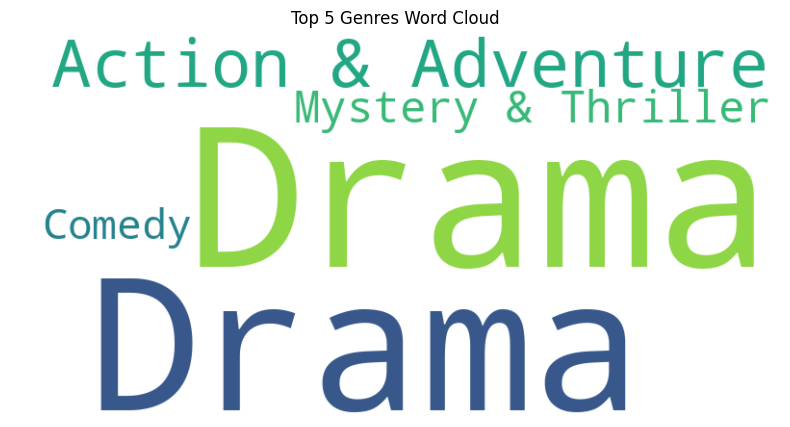

In [ ]:
#Let's Visvalize it using word cloud

# Convert the top 5 genres to a dictionary with genre names as keys and their counts as values
top_genres_ = top_genres.to_dict()

# Generate the word cloud for top 5 genres
wordcloud_genres = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(top_genres)

# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_genres, interpolation='bilinear')
plt.axis('off')
plt.title('Top 5 Genres Word Cloud')
plt.show()


## **Finding Predominant Streaming Service**

In [ ]:
# Write Your Code here

# Combine the dataframes for a comprehensive analysis
combined_df = pd.concat([filtered_movies, filtered_shows], ignore_index=True)

# Split and explode the Streaming_Services column to separate each service into a new row
services_series = combined_df['Streaming_Services'].str.split(', ').explode()

# Drop any NaN values that may have resulted from splitting
services_series = services_series.dropna()

# Count the occurrences of each streaming service
service_counts = services_series.value_counts()

# Get the streaming service with the most significant number of offerings
top_service = service_counts.idxmax()
top_service_count = service_counts.max()

print(f"The streaming service with the most offerings is {top_service} with {top_service_count} offerings.")


The streaming service with the most offerings is Amazon Prime Video with 30 offerings.


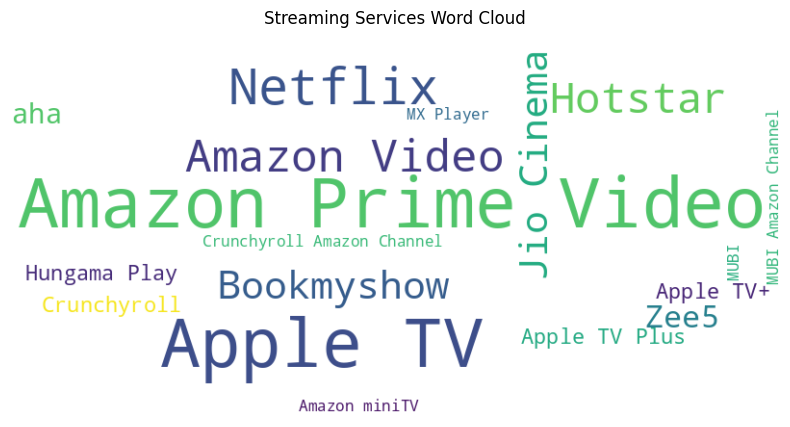

In [ ]:
#Let's Visvalize it using word cloud
# Generate a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(service_counts)

# Display the word cloud using matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Hide the axis
plt.title('Streaming Services Word Cloud')
plt.show()

## **Task 3 :- Data Export**

In [ ]:
#saving final dataframe as Final Data in csv format
# Save the filter movie dataframe to a CSV file
filtered_movies.to_csv('Final_Data_Movies.csv', index=False)

In [ ]:
#saving filter data as Filter Data in csv format
# Save the filter show dataframe to a CSV file
filtered_shows.to_csv('Final_Data_Shows.csv', index=False)

# **Dataset Drive Link (View Access with Anyone) -**

Filtred Show Data Link -  https://drive.google.com/file/d/1gn7KvZ10Rpnn2MuqOjN2wlCvi13Dj2Cg/view?usp=drive_link

Filtred Movie Data Link - https://drive.google.com/file/d/10oyHcaZxXOg_QjCL_BwR_jDWUrHHC5jN/view?usp=drive_link